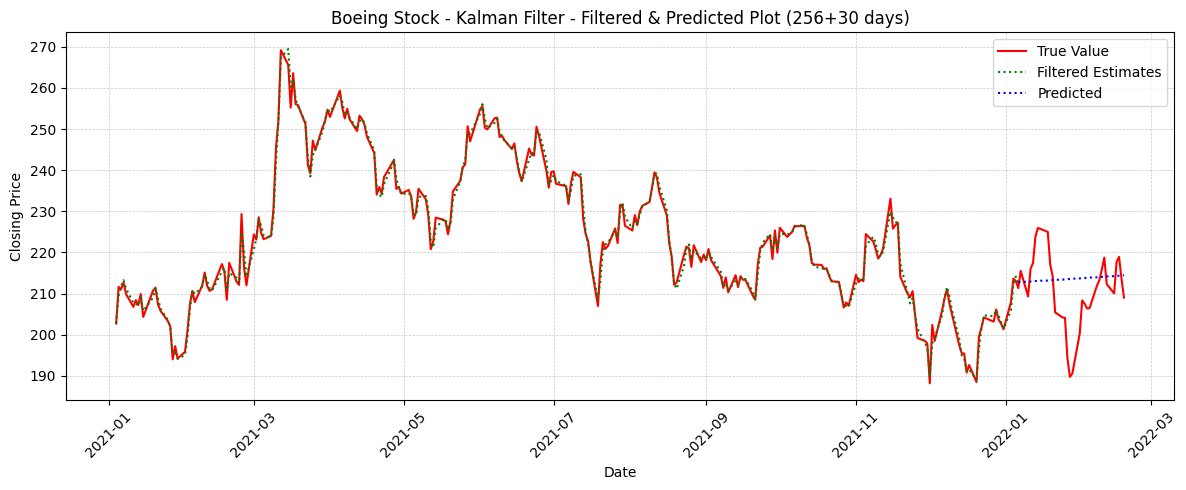

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------------- user‑tunable parameters ----------------
start_date   = '2021-01-01'         # first day of the window
filter_days  = 256                   # how many real days to Kalman‑filter
predict_days = 30                    # how many days to predict beyond the filter
csv_path     = 'BOEING_STOCK.csv'   # adjust if file lives elsewhere
# ---------------------------------------------------------

# 1) Load data
df = None
if os.path.exists(csv_path):
    df_raw = pd.read_csv(csv_path, header=None, dtype=str)
    mask   = df_raw[0].str.match(r'\d{4}-\d{2}-\d{2}', na=False)
    df     = df_raw[mask].copy()
    df.columns = ['Date','Adj Close','Close','High','Low','Open','Volume']
    df['Date']  = pd.to_datetime(df['Date'])
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df          = df.sort_values('Date').dropna(subset=['Close']).reset_index(drop=True)
else:
    # Generate synthetic
    dates_all = pd.bdate_range(start=start_date, periods=filter_days+predict_days)
    values    = np.cumsum(np.random.randn(filter_days+predict_days)) + 100
    df = pd.DataFrame({'Date': dates_all, 'Close': values})

# 2) Prepare slices
start_idx   = df['Date'].searchsorted(pd.to_datetime(start_date))
df_after    = df.iloc[start_idx:].reset_index(drop=True)
n_filter    = min(filter_days, len(df_after))
total_days  = min(n_filter + predict_days, len(df_after))

dates_all   = df_after['Date'].iloc[:total_days].to_numpy()
y_true_all  = df_after['Close'].iloc[:total_days].to_numpy()

dates_actual = dates_all[:n_filter]
y_actual     = y_true_all[:n_filter]
dates_future = dates_all[n_filter:total_days]
y_future     = y_true_all[n_filter:total_days]

# 3) Kalman components
dt = 1.0
A  = np.array([[1, dt],[0, 1]])
C  = np.array([[1, 0]])
Q  = np.array([[dt**4/4, dt**3/2],
               [dt**3/2,   dt**2]])
R  = 1.0

# 4) Initialize state
start_price = df_after.loc[0, 'Close']
x = np.array([start_price, 0.0])
P = np.diag([start_price, 1.0])

# 5) Kalman filter
filt_vals = []
for actual in y_actual:
    # Predict
    x = A @ x
    P = A @ P @ A.T + Q
    # Update
    y_pred = (C @ x)[0]
    S      = (C @ P @ C.T)[0,0] + R
    K      = P @ C.T / S
    x      = x + (K.flatten() * (actual - y_pred))
    P      = (np.eye(2) - K @ C) @ P
    filt_vals.append(x[0])
filt_vals = np.array(filt_vals)

# 6) Predictions (connected)
pred_vals  = []
for _ in range(predict_days):
    x = A @ x
    P = A @ P @ A.T + Q
    pred_vals.append((C @ x)[0])
pred_vals = np.array(pred_vals)

# prepend last filtered
pred_dates_full = np.concatenate(([dates_actual[-1]], dates_future))
pred_vals_full  = np.concatenate(([filt_vals[-1]], pred_vals))

# 7) Plot
plt.figure(figsize=(12, 5))
# # Observations
# plt.plot(dates_actual, y_actual,
#          'm|:', markersize=8, markeredgewidth=2, label='Observed')
# True value across full window (incl. future)
plt.plot(dates_all, y_true_all, 'r-', label='True Value')
# Filtered estimates
plt.plot(dates_actual, filt_vals, 'g:', label='Filtered Estimates')
# Connected predicted
plt.plot(pred_dates_full, pred_vals_full, 'b:', label='Predicted')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Boeing Stock - Kalman Filter - Filtered & Predicted Plot ({filter_days}+{predict_days} days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


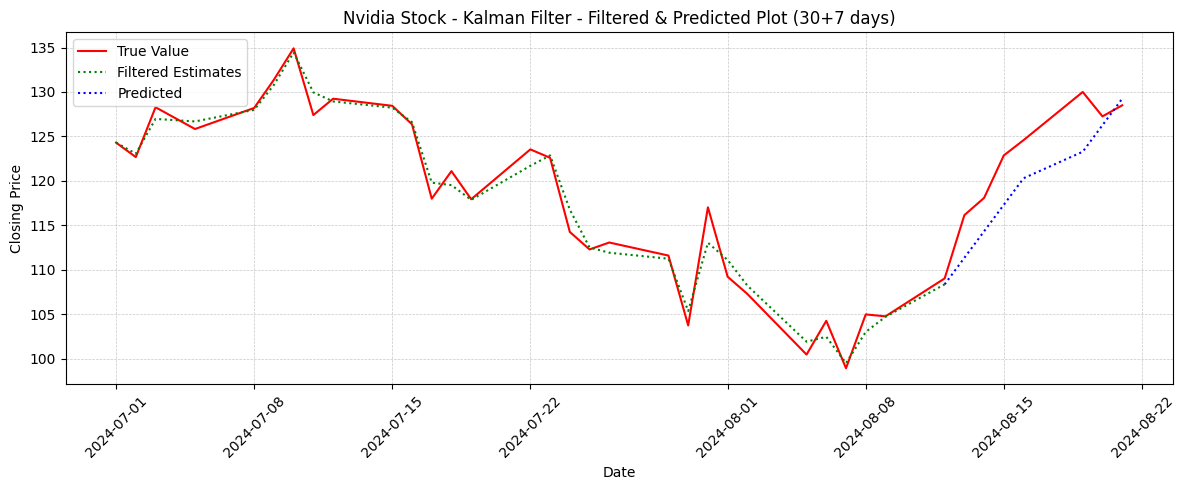

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------------- user‑tunable parameters ----------------
start_date   = '2024-07-01'         # first day of the window
filter_days  = 30                   # how many real days to Kalman‑filter
predict_days = 7                    # how many days to predict beyond the filter
csv_path     = 'NVIDIA_STOCK.csv'   # adjust if file lives elsewhere
# ---------------------------------------------------------

# 1) Load data
df = None
if os.path.exists(csv_path):
    df_raw = pd.read_csv(csv_path, header=None, dtype=str)
    mask   = df_raw[0].str.match(r'\d{4}-\d{2}-\d{2}', na=False)
    df     = df_raw[mask].copy()
    df.columns = ['Date','Adj Close','Close','High','Low','Open','Volume']
    df['Date']  = pd.to_datetime(df['Date'])
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df          = df.sort_values('Date').dropna(subset=['Close']).reset_index(drop=True)
else:
    # Generate synthetic
    dates_all = pd.bdate_range(start=start_date, periods=filter_days+predict_days)
    values    = np.cumsum(np.random.randn(filter_days+predict_days)) + 100
    df = pd.DataFrame({'Date': dates_all, 'Close': values})

# 2) Prepare slices
start_idx   = df['Date'].searchsorted(pd.to_datetime(start_date))
df_after    = df.iloc[start_idx:].reset_index(drop=True)
n_filter    = min(filter_days, len(df_after))
total_days  = min(n_filter + predict_days, len(df_after))

dates_all   = df_after['Date'].iloc[:total_days].to_numpy()
y_true_all  = df_after['Close'].iloc[:total_days].to_numpy()

dates_actual = dates_all[:n_filter]
y_actual     = y_true_all[:n_filter]
dates_future = dates_all[n_filter:total_days]
y_future     = y_true_all[n_filter:total_days]

# 3) Kalman components
dt = 1.0
A  = np.array([[1, dt],[0, 1]])
C  = np.array([[1, 0]])
Q  = np.array([[dt**4/4, dt**3/2],
               [dt**3/2,   dt**2]])
R  = 1.0

# 4) Initialize state
start_price = df_after.loc[0, 'Close']
x = np.array([start_price, 0.0])
P = np.diag([start_price, 1.0])

# 5) Kalman filter
filt_vals = []
for actual in y_actual:
    # Predict
    x = A @ x
    P = A @ P @ A.T + Q
    # Update
    y_pred = (C @ x)[0]
    S      = (C @ P @ C.T)[0,0] + R
    K      = P @ C.T / S
    x      = x + (K.flatten() * (actual - y_pred))
    P      = (np.eye(2) - K @ C) @ P
    filt_vals.append(x[0])
filt_vals = np.array(filt_vals)

# 6) Predictions (connected)
pred_vals  = []
for _ in range(predict_days):
    x = A @ x
    P = A @ P @ A.T + Q
    pred_vals.append((C @ x)[0])
pred_vals = np.array(pred_vals)

# prepend last filtered
pred_dates_full = np.concatenate(([dates_actual[-1]], dates_future))
pred_vals_full  = np.concatenate(([filt_vals[-1]], pred_vals))

# 7) Plot
plt.figure(figsize=(12, 5))
# # Observations
# plt.plot(dates_actual, y_actual,
#          'm|:', markersize=8, markeredgewidth=2, label='Observed')
# True value across full window (incl. future)
plt.plot(dates_all, y_true_all, 'r-', label='True Value')
# Filtered estimates
plt.plot(dates_actual, filt_vals, 'g:', label='Filtered Estimates')
# Connected predicted
plt.plot(pred_dates_full, pred_vals_full, 'b:', label='Predicted')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Nvidia Stock - Kalman Filter - Filtered & Predicted Plot ({filter_days}+{predict_days} days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
